In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pypher import pypher

# Functions

In [2]:
def blur(img, single_kernel):
    sz = (img.shape[0]-single_kernel.shape[0],img.shape[1]-single_kernel.shape[1])
    kernel_fft=pypher.psf2otf(single_kernel,shape=(img.shape[0], img.shape[1]))
    img_fft = np.fft.fftshift(np.fft.fft2(img))
    filtered_fft = img_fft*kernel_fft
    filtered_img = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_fft)))
    return filtered_img

In [3]:
# for Donald Grayscale
def blur2d_plot(img, kernel):
    plt.figure(figsize=(20,12))
    for i in range(4):
        filtered_img = blur(img, kernel[i])
        plt.subplot(2,2,i+1)
        plt.title(f'kernel {i+1}')
        plt.xticks([])
        plt.yticks([])
        plt.imshow(filtered_img, cmap='gray')
        plt.imsave(path+f'outputs/P5/donald_1_blur_kernel_{i+1}.png', filtered_img, cmap='gray')
    plt.savefig(path+f'outputs/P5/donald_1_blur.png')
    plt.show()

In [4]:
# for Donald RGB
def blur3d_plot(img,kernel):
    plt.figure(figsize=(20,12))
    for i in range(4):
        filtered_img = []
        for j in range(3):
            fil = blur(img[:,:,j],kernel[i])
            filtered_img.append(fil/np.max(fil)*255)
        filtered_img = np.dstack(filtered_img)
        filtered_img = cv2.cvtColor(filtered_img.astype('uint8'), cv2.COLOR_BGR2RGB)
        plt.subplot(2,2,i+1)
        plt.title(f'kernel {i+1}')
        plt.xticks([])
        plt.yticks([])
        plt.imshow(filtered_img, cmap='gray')
        plt.imsave(path+f'outputs/P5/donald_2_blur_kernel_{i+1}.png', filtered_img, cmap='gray')
    plt.savefig(path+f'outputs/P5/donald_2_blur.png')
    plt.show()

# Importing the Data

In [5]:
path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/'
kernel = []
for i in range(1,5):
    img = cv2.imread(path + f'inputs/P5/kernel_{i}.png')
    kernel.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

In [6]:
donald_in_car_1 = cv2.imread(path + 'inputs/P5/donald_in_car_1.png')
donald_in_car_1 = cv2.cvtColor(donald_in_car_1, cv2.COLOR_BGR2GRAY)
donald_in_car_2 = cv2.imread(path + 'inputs/P5/donald_in_car_2.png')

# Donald in the Car Grayscale

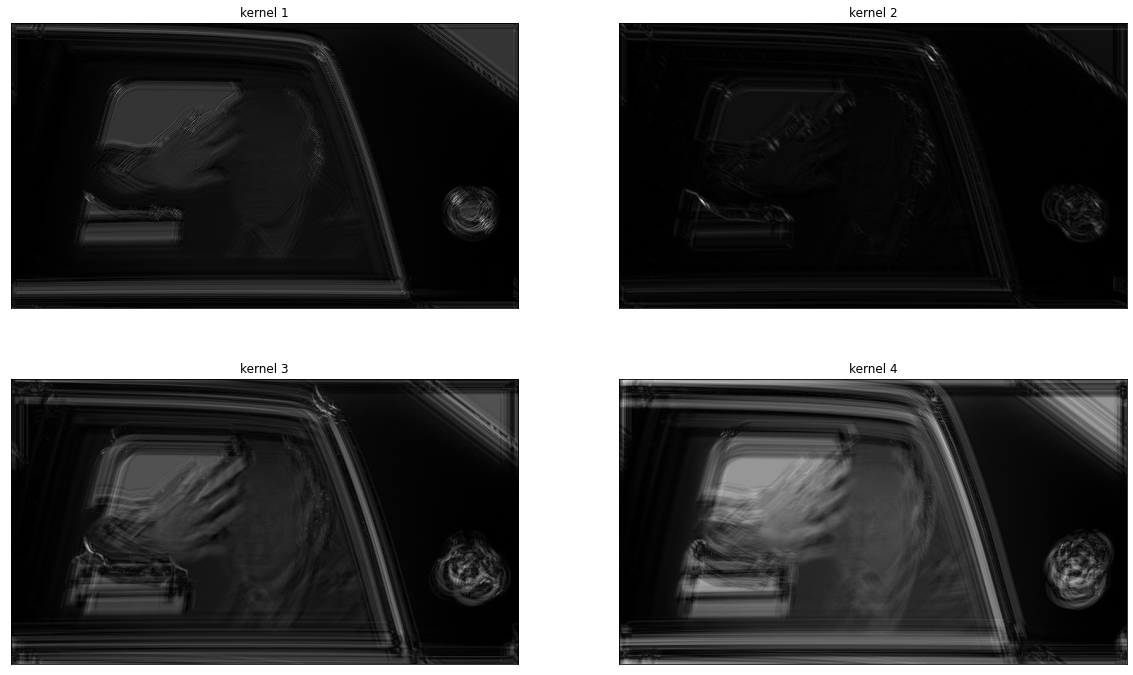

In [7]:
blur2d_plot(donald_in_car_1, kernel)

# Donald in the Car RGB

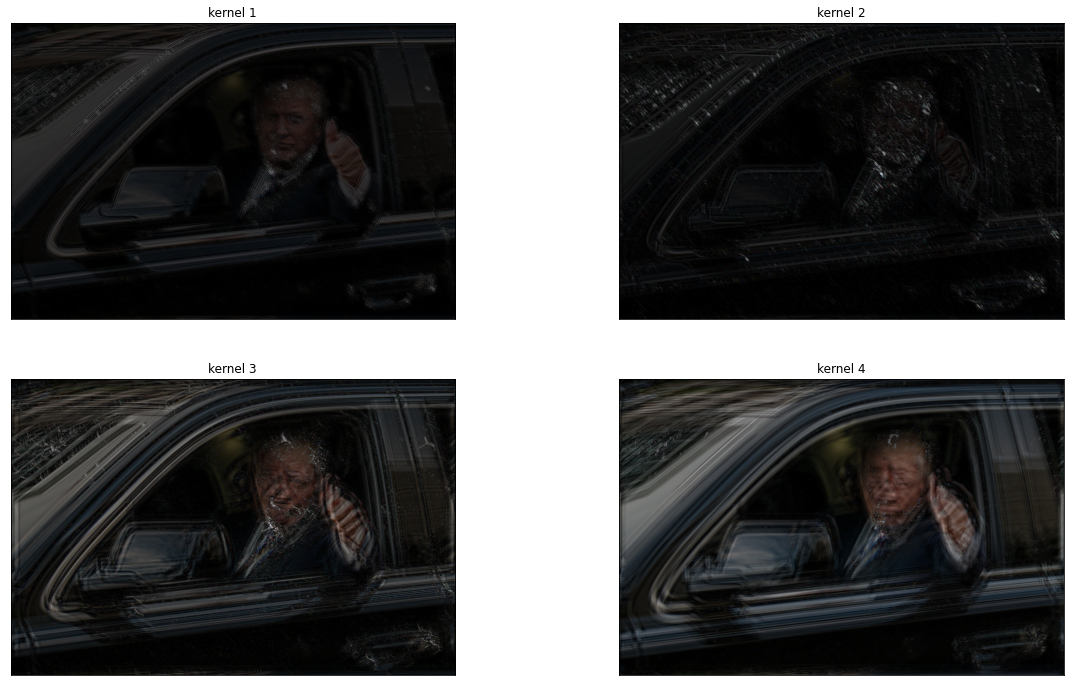

In [8]:
blur3d_plot(donald_in_car_2, kernel)